1. Get the transfer function Gp(s) of the process plant in the lab on paper and in Python. Any one Process Plant from the following can be selected:<br><br>
    (a) Level Control Loop <br>
    (b) Flow Control Loop<br>
    (c) Pressure Control Loop<br>
    (d) Temperature Control Loop<br>
    (e) __**Inverted Pendulum**__ <br>
    (f) DC Motor<br>
    (g) 2 link Robotic Arm<br>
    (h) Drone Control<br>

<br>
2. Get the Step response for the Plant transfer function

3. Get the root locus for the Process Plant transfer function Gp(s) assuming feedback H(s) = 1

4. Design PI or PD or PID Controller Gc(s)

5. Cascade the Controller Gc(s) with the process plant transfer function Gp(s)

6. Get the root locus of the cascade transfer function Gc(s)Gp(s)

7. Get the closed loop transfer function Y (s)R(s)

8. Get the Step response of the Closed loop Control system

9. Analyze the best performance of the controller for the process plant in Python

10. Use the designed controller to be implemented real time in the lab

The system in this example consists of an inverted pendulum mounted to a motorized cart.In this case we will consider a two-dimensional problem where the pendulum is constrained to move in the vertical plane shown in the figure below. For this system, the control input is the force $F$ that moves the cart horizontally and the outputs are the angular position of the pendulum $\theta$ and the horizontal position of the cart $x$.

<br>
<br>

For this example, let's assume the following quantities:

(M)       mass of the cart                         0.5 kg 
<br>
(m)       mass of the pendulum                     0.2 kg
<br>
(b)       coefficient of friction for cart         0.1 N/m/sec
<br>
(l)       length to pendulum center of mass        0.3 m
<br>
(I)       mass moment of inertia of the pendulum   0.006 kg.m^2
<br>
(F)       force applied to the cart
<br>
(x)       cart position coordinate
<br>
(theta)   pendulum angle from vertical (down)<br>


In [33]:
import numpy as np
import control
from matplotlib import pyplot as plt

Assumed design requirements:<br>
    Settling time for $\theta$ of less than 5 seconds<br>
    Pendulum angle $\theta$ never more than 0.05 radians from the vertical<br>

![alt text](cart.png "Image")

## Transfer function:

![alt text](tf.png "Transfer Function")



In [20]:
M = 0.5;
m = 0.2;
b = 0.1;
I = 0.006;
g = 9.8;
l = 0.3;
q = (M+m)*(I+ (m*l*l))-((m*l) * (m*l));


pend_tf_num=[m*l/q,0]
pend_tf_den=[1, b*(I+ (m*l*l))/q, -(M+m)*m*g*l/q, -(b*m*g*l/q)]

Ppend=control.tf(pend_tf_num,pend_tf_den)
print("Pendulum TF: ", Ppend)

Pendulum TF:  
             4.545 s
----------------------------------
s^3 + 0.1818 s^2 - 31.18 s - 4.455



## Get the Step response for the Plant transfer function

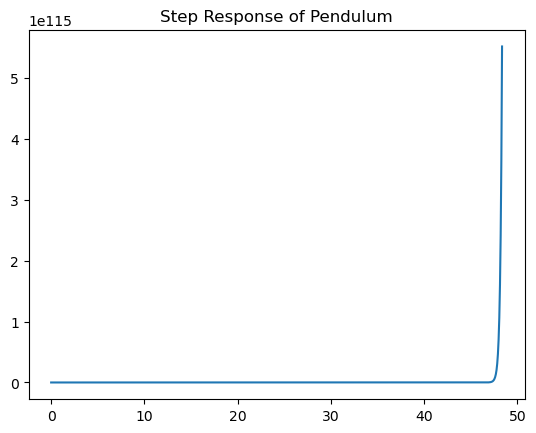

In [23]:
# t=np.arange(0,100.1,0.1)
T2, yout2 = control.step_response(Ppend)

plt.plot(T2,yout2)
plt.title("Step Response of Pendulum")
plt.show()

<b>For a bounded input, we are getting unbounded output. This is showing that the system is unstable. This is easily verified by observation as it is evident that even a small impulse will lead to inverted pendulum falling down.</b>

## Get the root locus for the Process Plant transfer function Gp(s)

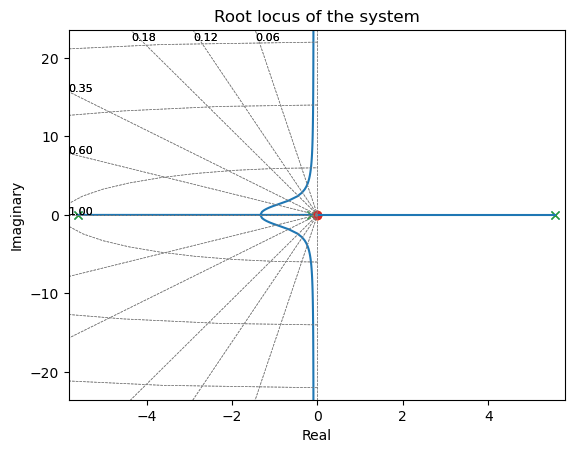

In [31]:
control.rlocus(Ppend, print_gain=True)
plt.title("Root locus of the system") 
plt.show()

<b>Since there is a pole in the right half plane, this again confirms that the system is unstable</b>


## Design PI or PD or PID Controller Gc(s)
## Cascade the Controller Gc(s) with the process plant transfer function


s^2 + s + 1
-----------
     s



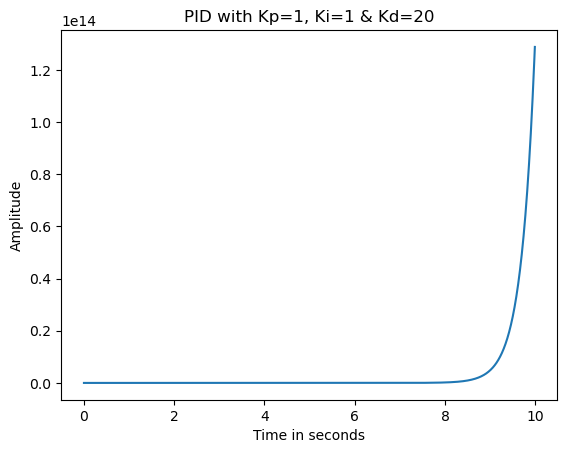

In [85]:
# Kp = 1;
# Ki = 1;
# Kd = 1;

#Thus, the tf of PID will be:
pid=control.tf([1,1,1],[1,0])
print(pid)

ser = control.series(pid,Ppend)

output=control.feedback(ser,1)
t=np.arange(0,10,0.01)
a, b = control.step_response(output,T=t)

plt.plot(a,b)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("PID with Kp=1, Ki=1 & Kd=20")
plt.show()

<b>Note how the system still has unbounded input. This means we have to tune the controller</b>


s^2 + 100 s + 1
---------------
       s



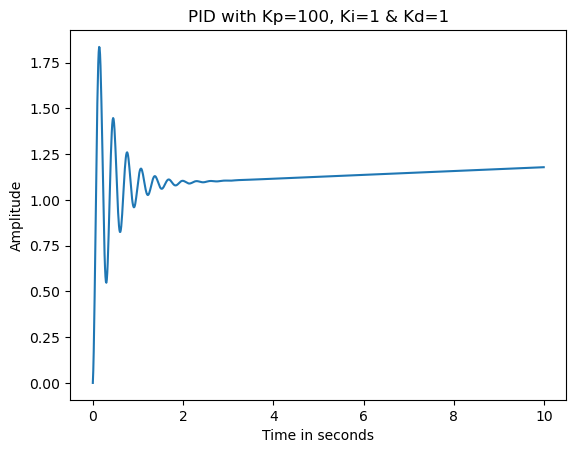

In [84]:
# Kp = 100;
# Ki = 1;
# Kd = 1;

#Thus, the tf of PID will be:
pid2=control.tf([1,100,1],[1,0])
print(pid2)

ser2 = control.series(pid2, Ppend)

output2=control.feedback(ser2,1)

a2, b2 = control.step_response(output2,T=t)

plt.plot(a2,b2)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("PID with Kp=100, Ki=1 & Kd=1")
plt.show()

   <b> Note now that the settling time is less than 5s, which is one of the design criteria. However, the peak response is still higher.</b>


20 s^2 + 100 s + 1
------------------
        s



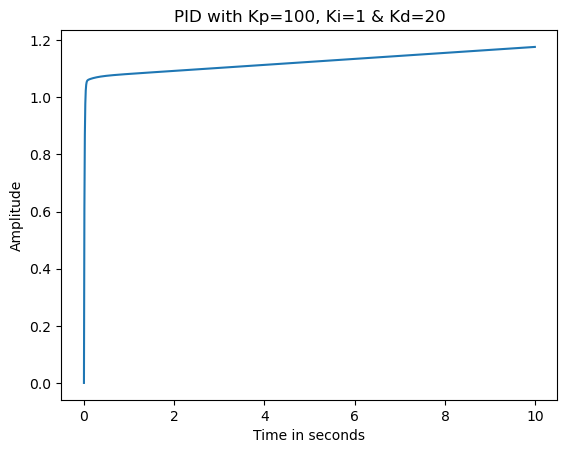

In [83]:
# Kp = 100;
# Ki = 1;
# Kd = 20;

#Thus, the tf of PID will be:
pid3=control.tf([20,100,1],[1,0])
print(pid3)
# T = control.feedback(Ppend,C);

ser3 = control.series(pid3,Ppend)

output3=control.feedback(ser3,1)

t=np.arange(0,10,0.01)
a3, b3 = control.step_response(output3,T=t)

plt.plot(a3,b3)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("PID with Kp=100, Ki=1 & Kd=20")
plt.show()

<b> Note how now the ripples are absent, the peak overshoot is low. This means no more tuning is required </b> 

## Get the root locus of the cascade transfer function


    90.91 s^3 + 454.5 s^2 + 4.545 s
---------------------------------------
s^4 + 91.09 s^3 + 423.4 s^2 + 0.09091 s



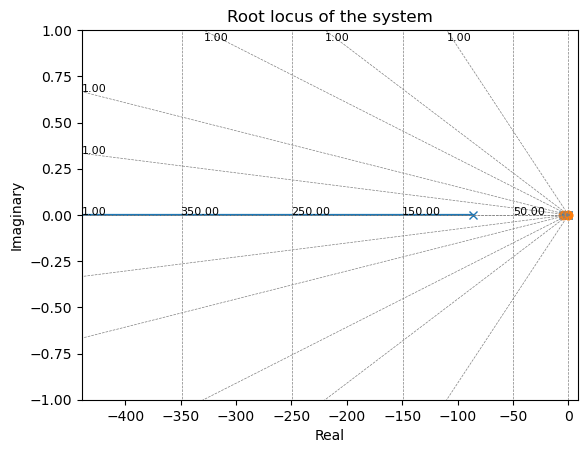

In [87]:
FinalOutput=output3
print(output3)

control.rlocus(FinalOutput, print_gain=True)
plt.title("Root locus of the system") 
plt.show()

## Get the closed loop transfer function Y (s)/R(s)
## Get the Step response of the Closed loop Control system

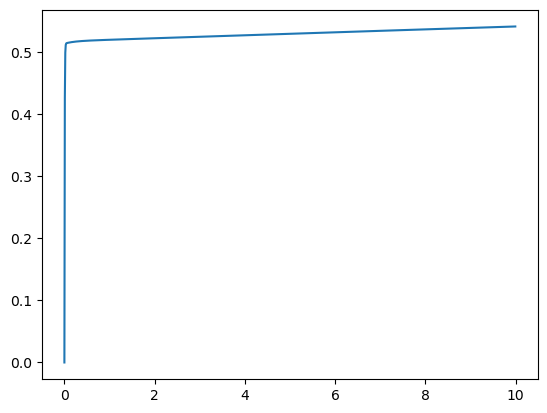

In [90]:
#Closed loop control system
Hs=1
Clcs= control.feedback(FinalOutput, Hs)


t=np.arange(0,10,0.01)
a4, b4 = control.step_response(Clcs,T=t)

plt.plot(a4,b4)
plt.show()